# Intercalated csro
In this example, we extract the self-energies and Eliashberg function of
intercalated csro.

Data have been provided with permission for re-use, originating from:
https://journals.aps.org/prb/abstract/10.1103/PhysRevB.97.085132


In [1]:
%load_ext autoreload
%autoreload 2

# Necessary packages
import xarpes
import matplotlib.pyplot as plt
import os

# Default plot configuration from xarpes.plotting.py
xarpes.plot_settings('default')

In [2]:
script_dir = xarpes.set_script_dir()

dfld = 'data_sets'    # Folder containing the data
flnm = 'csro_xarpes_demo' # Name of the file
extn = '.ibw'         # Extension of the file

data_file_path = os.path.join(script_dir, dfld, flnm + extn)

The following cell instantiates band map class object based on the Igor Binary Wave (ibw) file. The subsequent cell illustrates how a band map object could be instantiated with NumPy arrays instead. Only one of the cells will have to be executed to populate the band map object.

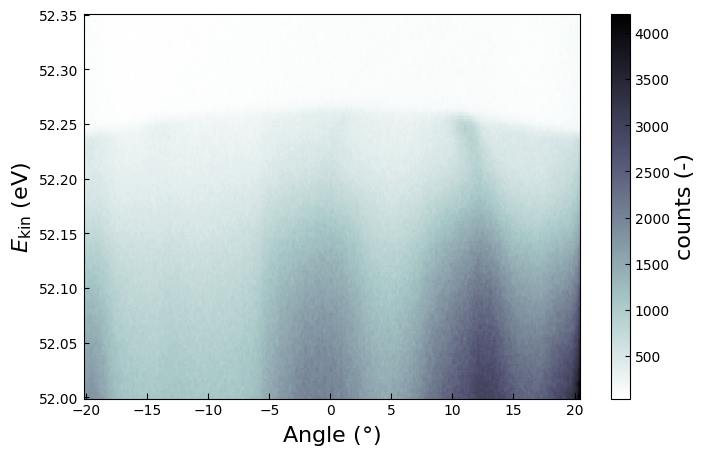

In [73]:
%matplotlib inline

bmap = xarpes.BandMap.from_ibw_file(data_file_path, energy_resolution=0.01, 
        angle_resolution=0.1, temperature=50)

# bmap.shift_angles(shift=-2.28)

fig = plt.figure(figsize=(8, 5)); ax = fig.gca()

fig = bmap.plot(abscissa='angle', ordinate='kinetic_energy', ax=ax)

In [ ]:
# %matplotlib inline

# import numpy as np

# intensities= np.load(os.path.join(dfld, "csro_152_intensities.npy"))
# angles = np.load(os.path.join(dfld, "csro_152_angles.npy"))
# ekin = np.load(os.path.join(dfld, "csro_152_ekin.npy"))

# bmap = xarpes.BandMap.from_np_arrays(intensities, angles, ekin, 
#         energy_resolution=0.01, angle_resolution=0.1, temperature=50)

# bmap.shift_angles(shift=-2.28)

# fig = plt.figure(figsize=(8, 5)); ax = fig.gca()

# fig = bmap.plot(abscissa='momentum', ordinate='kinetic_energy', ax=ax)

/Users/apple/Desktop/研究室/コード/xARPES/xarpes/plotting.py:72: UserWarning: Conversion from angle to momenta causes warping of the cell centers. 
 Cell edges of the mesh plot may look irregular.
  result = func(*args, **kwargs)


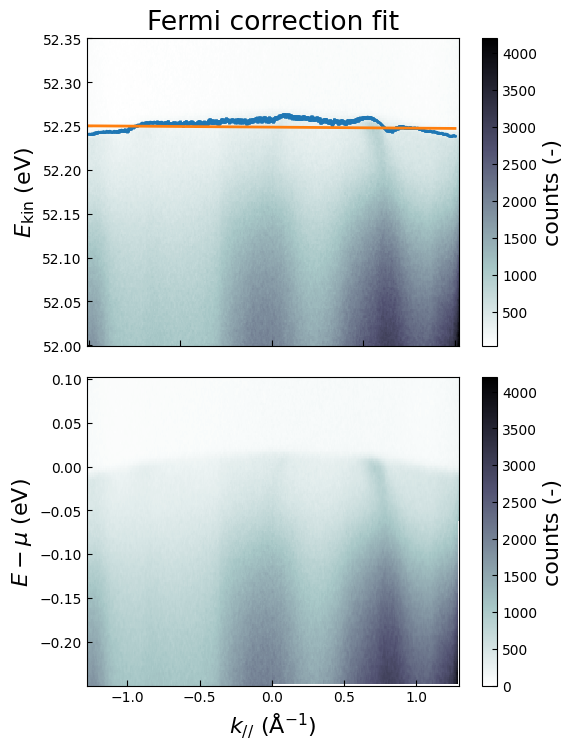

The optimised hnu - Phi=52.2488 +/- 0.00043 eV.


In [74]:
%matplotlib inline

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

bmap.correct_fermi_edge(
      hnuminPhi_guess=52.25, background_guess=500,
      integrated_weight_guess=3e5, angle_min=-20, angle_max=20,
      ekin_min=52.20, ekin_max=52.3, true_angle=0,
      ax=ax[0], show=False, fig_close=False)

bmap.plot(ordinate='electron_energy', abscissa='momentum',
      ax=ax[1], show=False, fig_close=False)

# Figure customization
ax[0].set_xlabel(''); ax[0].set_xticklabels([])
ax[0].set_title('Fermi correction fit')
fig.subplots_adjust(top=0.92, hspace=0.1)
plt.show()

print('The optimised hnu - Phi=' + f'{bmap.hnuminPhi:.4f}' + ' +/- '
      + f'{1.96 * bmap.hnuminPhi_std:.5f}' + ' eV.')

# fig = bmap.plot(ordinate='kinetic_energy', abscissa='angle')

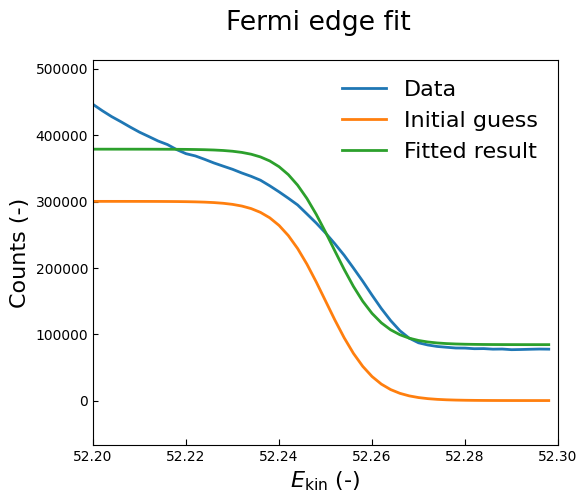

The optimised hnu - Phi=52.2516 +/- 0.00156 eV.


In [75]:
%matplotlib inline

fig = plt.figure(figsize=(6, 5))
ax = fig.gca()

fig = bmap.fit_fermi_edge(hnuminPhi_guess=52.25, background_guess=500,
                          integrated_weight_guess=3e5, angle_min=-20,
                          angle_max=20, ekin_min=52.2, ekin_max=52.3,
                          ax=ax, show=True, fig_close=True, title='Fermi edge fit')

print('The optimised hnu - Phi=' + f'{bmap.hnuminPhi:.4f}' + ' +/- '
      + f'{1.96 * bmap.hnuminPhi_std:.5f}' + ' eV.')

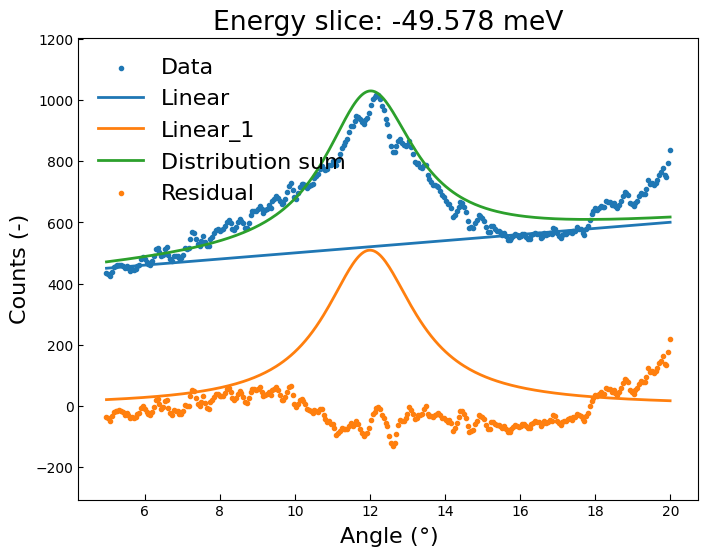

In [144]:
%matplotlib inline

angle_min = 5
angle_max = 20

energy_range = [-0.2, 0.01]
energy_value = -0.05

mdcs = xarpes.MDCs(*bmap.mdc_set(angle_min, angle_max, energy_range=energy_range))

guess_dists = xarpes.CreateDistributions([
xarpes.Linear(offset=4.0e2, slope=10),
xarpes.SpectralLinear(amplitude=40, peak=12, broadening=0.025,
                      name='Linear', index='1')
])

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

fig = mdcs.visualize_guess(distributions=guess_dists, energy_value=energy_value, ax=ax)

**Note on interactive figures**
- The interactive figure might not work inside the Jupyter notebooks, despite our best efforts to ensure stability.
- As a fallback, the user may switch from "%matplotlib widget" to "%matplotlib qt", after which the figure should pop up in an external window.
- For some package versions, a static version of the interactive widget may spuriously show up inside other cells. In that case, uncomment the #get_ipython()... line in the first cell for your notebooks.

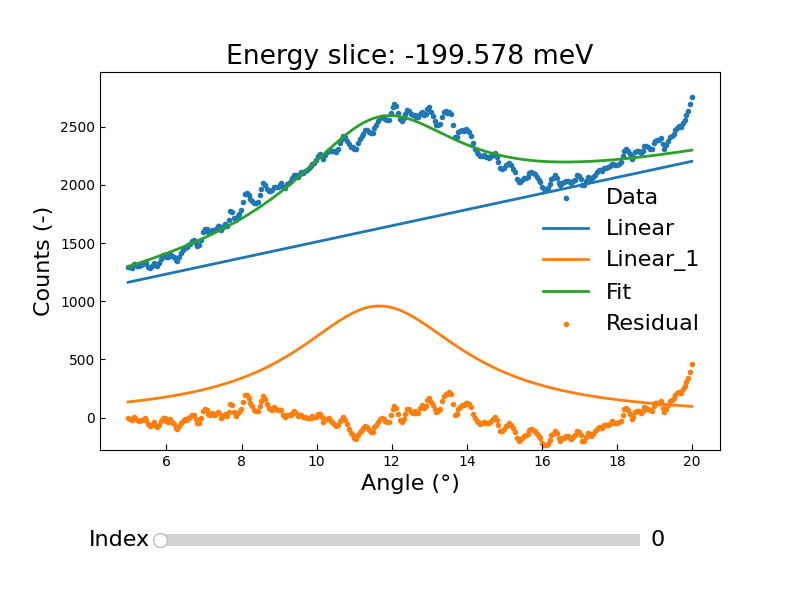

In [145]:
%matplotlib widget

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

mdcs = xarpes.MDCs(*bmap.mdc_set(angle_min, angle_max, energy_range=energy_range))

fig = mdcs.fit_selection(distributions=guess_dists, ax=ax)

/Users/apple/Desktop/研究室/コード/xARPES/xarpes/plotting.py:72: UserWarning: Conversion from angle to momenta causes warping of the cell centers. 
 Cell edges of the mesh plot may look irregular.
  result = func(*args, **kwargs)
/Users/apple/Desktop/研究室/コード/xARPES/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


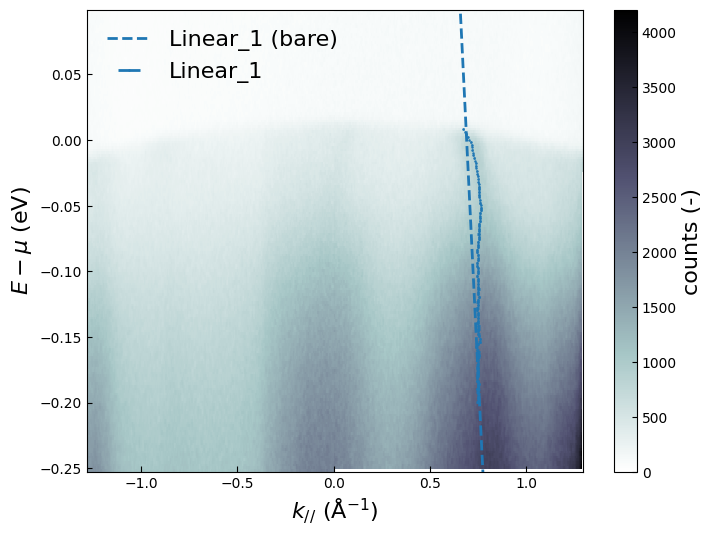

In [146]:
%matplotlib inline

plt.rcParams['lines.markersize'] = 0.8

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

self_energy = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Linear_1',
                                fermi_velocity=-3, fermi_wavevector=0.69))

self_energies = xarpes.CreateSelfEnergies([self_energy])

fig = bmap.plot(abscissa='momentum', ordinate='electron_energy', ax=ax,
                self_energies=self_energies, plot_dispersions='full')

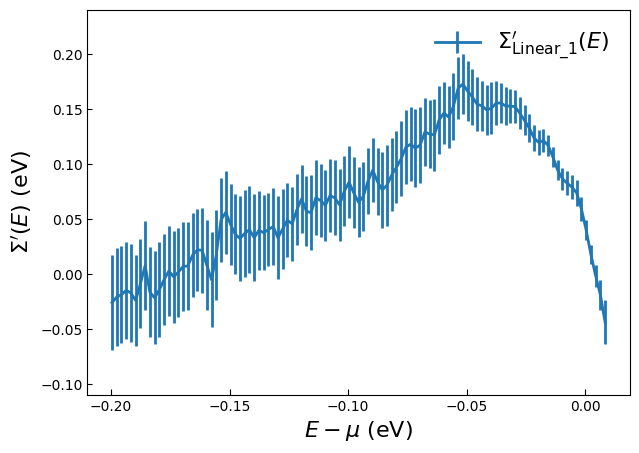

In [141]:
%matplotlib inline

xarpes.parameter_settings(new_sigma=4)

fig = plt.figure(figsize=(7, 5)); ax = fig.gca()

fig = self_energy.plot_real(ax=ax)

xarpes.parameter_settings(new_sigma=2)

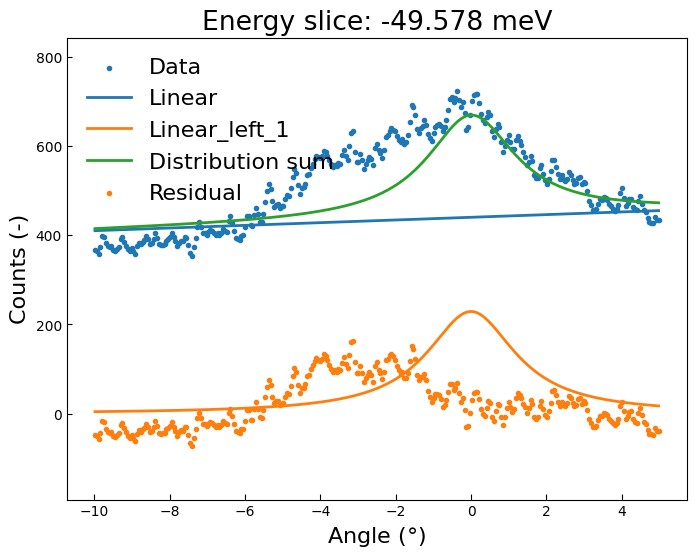

In [147]:
%matplotlib inline

angle_min2 = -10
angle_max2 = 5

plt.rcParams['lines.markersize'] = 3.0

mdc2 = xarpes.MDCs(*bmap.mdc_set(angle_min2, angle_max2, energy_range=energy_range))

guess_dists2 = xarpes.CreateDistributions([
xarpes.Linear(offset=4.4e2, slope=3),
xarpes.SpectralLinear(amplitude=18, peak=0, broadening=0.025,
                      name='Linear_left', index='1'),
])

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdc2.visualize_guess(distributions=guess_dists2, energy_value=energy_value, ax=ax)

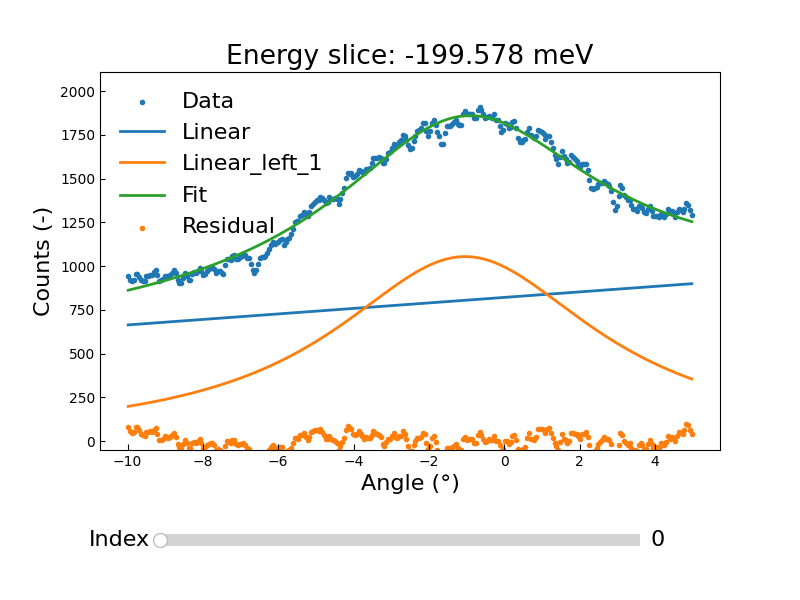

In [148]:
%matplotlib widget

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

fig = mdc2.fit_selection(distributions=guess_dists2, ax=ax)

/Users/apple/Desktop/研究室/コード/xARPES/xarpes/plotting.py:72: UserWarning: Conversion from angle to momenta causes warping of the cell centers. 
 Cell edges of the mesh plot may look irregular.
  result = func(*args, **kwargs)
/Users/apple/Desktop/研究室/コード/xARPES/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


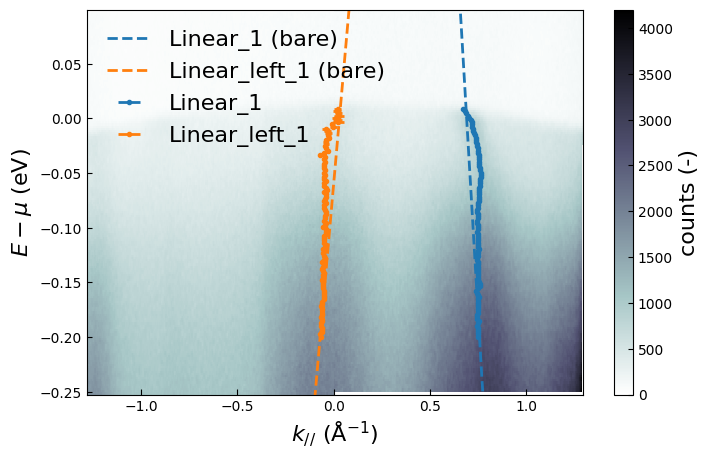

In [149]:
%matplotlib inline

self_left = xarpes.SelfEnergy(*mdc2.expose_parameters(select_label='Linear_left_1',
fermi_velocity=2, fermi_wavevector=0.03))

fig = plt.figure(figsize=(8, 5)); ax = fig.gca()

self_energies= xarpes.CreateSelfEnergies([
    self_energy, self_left
])

fig = bmap.plot(abscissa='momentum', ordinate='electron_energy',
                self_energies=self_energies, plot_dispersions='full',
                ax=ax)

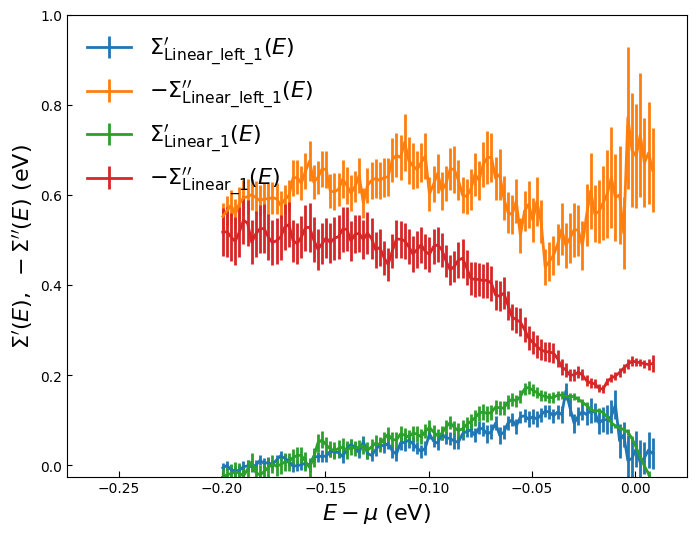

In [150]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

self_left.plot_both(ax=ax, show=False, fig_close=False)
self_energy.plot_both(ax=ax, show=False, fig_close=False)

ax.set_xlim([-0.275, 0.025])
ax.set_ylim([-0.025, 1.0])

plt.legend(); plt.show()

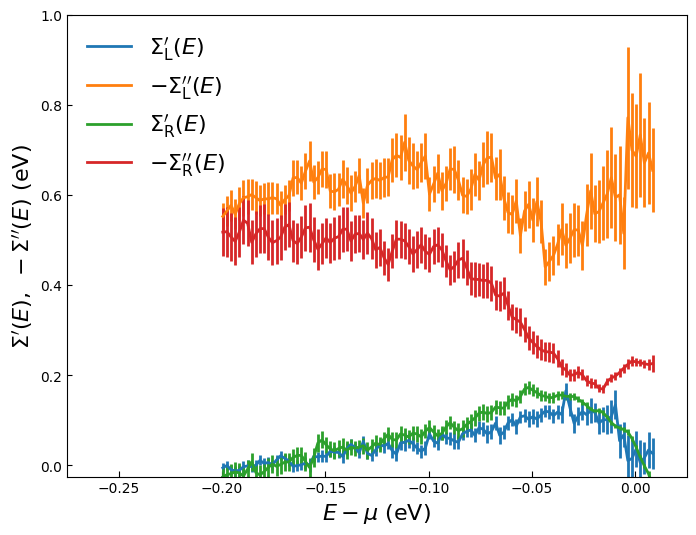

In [153]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

self_left.plot_both(ax=ax, show=False, fig_close=False)
self_energy.plot_both(ax=ax, show=False, fig_close=False)

ax.set_xlim([-0.275, 0.025]); ax.set_ylim([-0.025, 1.0])

# Replace labels with custom labels
left_real, left_imag, right_real, right_imag = ax.get_lines()

labels = [
    r"$\Sigma_{\mathrm{L}}'(E)$", r"$-\Sigma_{\mathrm{L}}''(E)$",
    r"$\Sigma_{\mathrm{R}}'(E)$", r"$-\Sigma_{\mathrm{R}}''(E)$",
]

ax.legend([left_real, left_imag, right_real, right_imag], labels)
plt.show()

In [ ]:
# Eliashberg function α²F(ω) via MEM + Bayesian outer loop
#
# Key point:
# - Start with a *single evaluation* (vary=()) to check MEM stability.
# - Only then enable optimisation (vary=(...)).
#
# Units:
# - Frequencies ω are in meV.

import numpy as np

# Avoid ω≈0: n_B(ω) gets large as ω→0 and can make the kernel ill-conditioned.
# For parts="both" we use a more conservative grid and stronger regularisation.
omega_min = 20.0
omega_max = 180.0
omega_num = 60

# Model breakpoints (meV) for the default model m_n(ω)
omega_I = 20.0
omega_M = 120.0

# MEM settings for parts="both" (extra conservative).
# Goal: make the *sanity check* (vary=()) run without linear-algebra failures.
mem = {
    "parts": "both",
    "h_n": 1e-3,               # must be set
    "lambda_el": 0.0,
    "impurity_magnitude": 0.0, # meV

    # Strong damping / truncation
    "mu": 1e5,
    "sigma_svd": 5e-1,
    "iter_max": 10000,

    # Narrower alpha scan range to avoid extreme alphas
    "alpha_min": 2.0,
    "alpha_max": 4.0,
    "alpha_num": 6,

    # Safer energy window (meV): stay away from EF and deep binding energies
    "ecut_left": 150.0,
    "ecut_right": 40.0,
}

# 1) Sanity check without optimisation
cost, a2f, model, alpha_select = self_energy.bayesian_loop(
    omega_min=omega_min, omega_max=omega_max, omega_num=omega_num,
    omega_I=omega_I, omega_M=omega_M,
    fermi_velocity=self_energy.fermi_velocity,
    fermi_wavevector=self_energy.fermi_wavevector,
    vary=(),
    mem=mem,
)

# 2) Enable optimisation only after the above line succeeds
vary = ("h_n","impurity_magnitude")

cost, a2f, model, alpha_select, params = self_energy.bayesian_loop(
    omega_min=omega_min, omega_max=omega_max, omega_num=omega_num,
    omega_I=omega_I, omega_M=omega_M,
    fermi_velocity=self_energy.fermi_velocity,
    fermi_wavevector=self_energy.fermi_wavevector,
    vary=vary,
    mem=mem,
    opt_method="Nelder-Mead",
    opt_options={"maxiter": 200},
)

omega = np.linspace(omega_min, omega_max, omega_num)

fig = plt.figure(figsize=(7, 4))
ax = fig.gca()
ax.plot(omega, a2f, label=r"$\alpha^2F(\omega)$")
ax.plot(omega, model, "--", label="Model")
ax.set_xlabel("Energy (meV)")
ax.set_ylabel("a2F (arb. units)")
ax.set_title("Eliashberg function (MEM + Bayesian loop)")
ax.legend()
plt.tight_layout()
plt.show()